In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load the image

In [3]:
filename = 'highlights_and_shadows.jpg'  
image_bgr = cv2.imread(filename)

Convert from BGR to LAB Color Space

In [4]:
image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

Split the channels (L, A, B)

In [5]:
l_channel, a_channel, b_channel = cv2.split(image_lab)

Normalize L channel to [0, 1] for processing

In [6]:
l_float = l_channel.astype(float) / 255.0

Apply Gamma Correction

In [7]:
gamma = 0.6  
print(f"Applying Gamma Correction with gamma = {gamma}")

Applying Gamma Correction with gamma = 0.6


In [8]:
l_corrected = np.power(l_float, gamma)
l_corrected_uint8 = np.clip(l_corrected * 255, 0, 255).astype(np.uint8)
lab_corrected = cv2.merge((l_corrected_uint8, a_channel, b_channel))

Convert back to BGR for display

In [9]:
 image_corrected = cv2.cvtColor(lab_corrected, cv2.COLOR_LAB2BGR)

--- VISUALIZATION ---

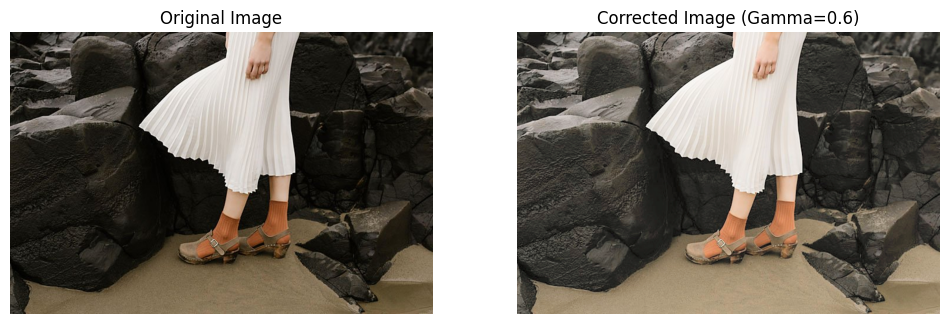

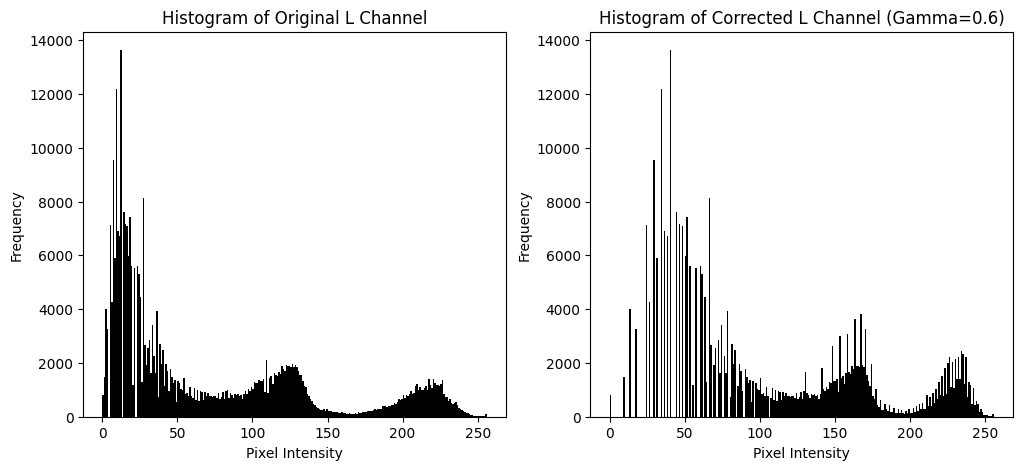

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_corrected, cv2.COLOR_BGR2RGB))
plt.title(f'Corrected Image (Gamma={gamma})')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(l_channel.ravel(), 256, [0, 256], color='black')
plt.title('Histogram of Original L Channel')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(l_corrected_uint8.ravel(), 256, [0, 256], color='black')
plt.title(f'Histogram of Corrected L Channel (Gamma={gamma})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
    
plt.show()